# Week 7 worksheet: Spherically symmetric parabolic PDEs

This worksheet contains a number of exercises covering only the numerical aspects of the course. Some parts, however, still require you to solve the problem by hand, i.e. with pen and paper. The rest needs you to write pythob code. It should usually be obvious which parts require which.

#### Suggested reading

You will see lists of links to further reading and resources throughout the worksheets, in sections titled **Learn more:**. These will include links to the Python documentation on the topic at hand, or links to relevant book sections or other online resources. Unless explicitly indicated, these are not mandatory reading, although of course we strongly recommend that you consult them!

#### Displaying solutions

Solutions will be released after the workshop, as a new `.txt` file in the same GitHub repository. After pulling the file to Noteable, **run the following cell** to create clickable buttons under each exercise, which will allow you to reveal the solutions.

## Note:
This workbook expects to find a diretory called figures in the same folder as well as the scripts folder.  Please make sure you download figures (and the files it contains) from the GitHub.

In [1]:
%run scripts/create_widgets.py W07

<IPython.core.display.Javascript object>

Buttons created!


*How it works: You will see cells located below each exercise, each containing a command starting with `%run scripts/show_solutions.py`. You don't need to run those yourself; the command above runs a script which automatically runs these specific cells for you. The commands in each of these cells each create the button for the corresponding exercise. The Python code to achieve this is contained in `scripts/show_solutions.py`, and relies on [IPython widgets](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Basics.html) --- feel free to take a look at the code if you are curious.*

In [2]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

## Exercise 1

$$
\newcommand{\vect}[1]{\bm #1}
\newcommand{\grad}{\nabla}
\newcommand{\pderiv}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\pdderiv}[2]{\frac{\partial^2 #1}{\partial #2^2}}
$$

Consider the spherically symmetric form of the heat conduction equation
$$
\pdderiv{u}{r} + \frac{2}{r}\pderiv{u}{r} = \frac1\kappa\pderiv{u}{t}
$$

### Part a)

Define
$$
v(r,t) = r u(r,t)
$$
and show that $v$ satisfies the standard one-dimensional heat conduction equation. 

What can we expect of a solution as $r\to\infty$?

**Remarks:**

- The worksheet requires understanding of the material from Analytical methods Part 6: Spherical coordinates
- The material is applied in Analytical methods Example 5: Radially symmetric heat conduction example 9.24b

In [3]:
%run scripts/show_solutions.py W07_ex1_parta

Button(description='Reveal solution', style=ButtonStyle())

Output(layout=Layout(border='1px solid green'))

### Part b)

Solve the equation in the annulus $a\le r\le b$ subject to the boundary conditions
\begin{align*}
u(a,t) &= T_0, \quad & t>0 \\
u(b,t) &= 0, \quad & t>0 \\
u(r,0) &= 0, & a\le r\le b
\end{align*}

Show that the solution has the form
$$
T(r,t) = \frac{a T_0}{r} \left[\frac{b-r}{b-a} - \sum_{N=1}^\infty A_N e^{-\kappa\lambda^2 t} \sin\left(\frac{r-a}{b-a}N\pi\right) \right]
$$
where $\lambda(b-a)=N\pi$. Evaluate the Fourier coefficients $A_N$.

In [4]:
%run scripts/show_solutions.py W07_ex1_partb

Button(description='Reveal solution', style=ButtonStyle())

Output(layout=Layout(border='1px solid green'))

### Part c)

Modify the 1D solver from the Explicit-Parabolic Solver workbook so that it is solving the spherically symmetric form of the heat conduction equation,
$$
\pdderiv{u}{r} + \frac{2}{r}\pderiv{u}{r} = \frac1\kappa\pderiv{u}{t}.
$$

Remember that you will need to discretise the first derivative $\pderiv{u}{r}$ using the central 2nd order finite difference approximation and will then need to find the coefficients for the spherical form of the FTCS scheme.

Use this solver to solve the problem on an annulus where $a=0.1$, $b=1$ and $T_0=100$ Celcius.  Compare your solution with the analytical solution from part (b) 



## Solution
We have 
$$
\pdderiv{u}{r} + \frac{2}{r}\pderiv{u}{r} = \frac1\kappa\pderiv{u}{t}.
$$
Using the 2nd order finite difference approximations for the spatial derivatives and the forard first order approximation for the time derivative.

$$ \begin{align*}
\pdderiv{u}{r} &\approx \frac{u^n_{i-1}-2u_i+u_{i+1}}{\Delta r^2} \\
\pderiv{u}{r} &\approx \frac{u^n_{i+1}-u_{i+1}}{2\Delta r} \\
\pderiv{u}{t} &\approx \frac{u^{n+1}_{i}-u^n_{i}}{\Delta t} \\
\end{align*} $$

Substituting into the governing equation:

$$ \frac{u^n_{i-1}-2u^n_i+u^n_{i+1}}{\Delta r^2} + \frac{2}{r_i}\frac{u^n_{i+1}-u^n_{i+1}}{2\Delta r} = \frac1\kappa\frac{u^{n+1}_{i}-u^n_{i}}{\Delta t} $$

multiply bs by $\kappa\Delta t$

$$ \frac{\kappa\Delta t}{\Delta r^2}\left(u^n_{i-1}-2^nu_i+u^n_{i+1}\right) + \frac{\kappa\Delta t}{r_i\Delta r}\left(u^n_{i+1}-u^n_{i+1}\right) = u^{n+1}_{i}-u^n_{i}. $$

Rearranging

$$ u^{n+1}_i = u^n_i + \frac{\kappa\Delta t}{\Delta r^2}\left(u^n_{i-1}-2^nu_i+u^n_{i+1}\right) + \frac{\kappa\Delta t}{r_i\Delta r}\left(u^n_{i+1}-u^n_{i+1}\right). $$

Now the FTCS would be 
$$u^{n+1}_i = u^n_i + \frac{\kappa\Delta t}{\Delta r^2}\left(u^n_{i-1}-2^nu_i+u^n_{i+1}\right)$$

So we can see that we need the FTCS scheme with an additional term,
$$\frac{\kappa\Delta t}{r_i\Delta r}\left(u^n_{i+1}-u^n_{i+1}\right),$$ 
which depends on the radius at the point $i$.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import time

def one(t):
    '''simple function of x and t which allways returns 1.0'''
    return 1.0

class Grid:
    '''Class defining the grid for a 1D parabolic solver.  Solving
    
    $$\frac{\partial u}{\partial t}=\kappa\left(\frac{\partial^2 u}{\partial x^2}\right)$$

    The grid object contains the number of grid points (Ni), left
    and right ordinates (x0 and x1), flags for wether the boundaries
    are Dirichlet or Neumann boundary conditions and functions for
    plotting the solution both at a particular time level and in the
    form of an x-t plot.  The grid also contains the solution vector (u)
    which is stored as an array with differnt time levels, together with
    the number of time steps N_t and the (uniform) time step Delta_t.
    
    Written by Prof David Ingram, School of Engineering
    (c) 2021 The University of Edinburgh
    Licensed under CC-BY-NC.
    '''
    
    DIRICHLET_BC = 0
    NEUMANN_BC = 1

    BC_NAME = ['left', 'right']
    
    def __init__(self,ni):
        # set up information about the grid
        self.x0 = 0.0 #  left
        self.x1 = 1.0 #  right
        self.N_i = ni # grid points in i direction
        self.N_t = 0 # how many time steps have we performed
        self.Delta_t = 0.0 # no dt value yet
        self.kappa = 1.0 # Thermal Diffusivity

        # initialse x,y and u arrays
        self.u = np.zeros((1,ni))
        self.x = np.zeros(ni)
        self.t = np.zeros(1)

        # boundary conditions (left and right )
        self.BC = [ self.DIRICHLET_BC, self.DIRICHLET_BC ]
        self.BC_fun = [ one, one ]

    def set_x0(self,x0):
        self.x0 = x0
    
    def set_x1(self,x1):
        self.x1 = x1
        
    def generate(self,Quiet=True):
        '''generate a uniformly spaced grid covering the domain from the
        x0 to the x1.  We are going to do this using linspace from
        numpy to create a list of x ordinates.'''
        self.x = np.linspace(self.x0, self.x1, self.N_i)
        if not Quiet:
            print(self)

    def initial_conditions(self,fun):
        '''set the initial conditions by calling the specified function
        fun(x) at every ordinate'''
        for i in range(self.N_i):
            self.u[0,i] = fun(self.x[i])

    def Delta_x(self):
        # calculate delta x
        return self.x[1]-self.x[0]
    
    def set_Neumann_bc(self,side):
        try:
             self.BC[self.BC_NAME.index(side)] = self.NEUMANN_BC
        except:
             print('error {} must be one of {}'.format(side,self.BC_NAME))
     
    def set_Dirichlet_bc(self,side,fun):
        '''set the Dirichlet boundary condition.  As well as the side
        this must be passed a function fun(t) which returns the value
        associated with the Dirichlet boundary at the time t.'''
        try:
            self.BC[self.BC_NAME.index(side)] = self.DIRICHLET_BC
        except:
            print('error {} must be one of {}'.format(side,self.BC_NAME))
        self.BC_fun[self.BC_NAME.index(side)] = fun

    def set_Delta_t(self,Coutrant_number):
        # set the time step using the Courant-Friedirchs-Lewey condition
        self.Delta_t = Coutrant_number * self.Delta_x()**2/(2*self.kappa) 
            
    def apply_BC(self,t):
        '''Apply the left and right boundary conditions to the values in
        the latest value of u at the current time level'''
        # left boundary
        if self.BC[0]==self.NEUMANN_BC:
            self.u[-1,0] = self.u[-1,2]
        else:
            self.u[-1,0] = self.BC_fun[0](t)
        
        # right
        if self.BC[1]==self.NEUMANN_BC:
            self.u[-1,-1] = self.u[-1,-3]
        else:
            self.u[-1,-1] = self.BC_fun[1](t)
    
    def integrate(self,t_stop,solver):
        '''call the integrator defined by solver to integrate
        the solution from t=0 to t=t_stop.'''
        
        time = 0.0
        o_time = t_stop/10
        print('Integrating to {:.3g} seconds Δt={:.3g} :'.format(t_stop,self.Delta_t),end='')
        
        # save the initial conditions as the first saved result
        self.u = np.vstack([self.u, self.u])
        self.t = np.vstack([self.t, 0.0])

        # time loop
        while True:
            # short time step at the end
            dt = min(self.Delta_t,t_stop-time)
            
            # update the boundary conditions and call the solver
            self.apply_BC(time)
            
            # update the time and save the time and results
            time += dt
            self.u[-1] = solver(self)
            self.t[-1] = time

            # progress monitor
            if (time >= o_time) & (time<t_stop):
                print('#',end='')
                o_time += t_stop/10
                self.t = np.vstack([self.t, time])
                self.u = np.vstack([self.u, self.u[-1]])
                self.N_t += 1
 
            # are we done
            if time >= t_stop:
                print('. ')
                break
        
    def plot(self,title):
        '''plot the solution at the current time level.  If there are
        more than 30 points in the x-direction then a line is used.'''
        if self.N_i<30:
            plt.plot(self.x,self.u[self.N_t],'ob')
        else:
            plt.plot(self.x,self.u[self.N_t],'-b')
        plt.title(title+', t={:.2f}'.format(self.N_t*self.Delta_t))
        plt.show()
        
    def report_BC(self):
        '''compile a string listing the boundary conditions on each side.
        We build up a string of two {side name}: {BC type} pairs and
        return it'''
        
        # initialise the string
        string = ''
        
        # loop over the sides
        for side in range(2):
            # add the side name
            string = string + self.BC_NAME[side]
            # and the bounday condition type
            if self.BC[side] == self.DIRICHLET_BC:
                string = string + ': Dirichlet, '
            elif self.BC[side] == self.NEUMANN_BC:
                string = string + ': Neumann, '
        return string[:-2] +'.' # lose the last comma and space.
    
    def __str__(self):
        # describe the object when asked to print it
        describe = 'Parabolic problem, 𝜅={:.3g}\n'.format(self.kappa)
        describe += 'Uniform {} node grid from {} to {}.\n'.format(self.N_i, self.x0, self.x1)
        describe += 'Boundaries conditions are - ' + self.report_BC()
        if self.N_t==0:
            describe += '\nInitial conditions at t=0.0, Δt={:.3g} seconds'.format(self.Delta_t)
        else:
            describe += '\n{} time steps from t=0.0 to t={:.3g}, Δt={:.3g} seconds'.format(self.N_t+1,self.N_t*self.Delta_t,self.Delta_t)
        return describe

In [24]:
# Now we have coppied the Grid class from the Explicit-Parabolic Solver workbook we can set up the problem.
def hot_bc(x):
    return 100.0

def cold_bc(x):
    return 0.0

def u_init(x):
    return 0.0*x

test = Grid(101)
test.set_x0(0.1)
test.set_x1(1.0)
test.generate()
test.set_Delta_t(0.95)
test.set_Dirichlet_bc('right',cold_bc)
test.set_Dirichlet_bc('left',hot_bc)
test.initial_conditions(u_init)
test.plot('Spherical heat transfer')
print(test)


Parabolic problem, 𝜅=1
Uniform 101 node grid from 0.1 to 1.0.
Boundaries conditions are - left: Dirichlet, right: Dirichlet.
Initial conditions at t=0.0, Δt=3.85e-05 seconds


In [27]:
# Now implement the spherical FTCS scheme
def FTCS_sphere(grid):
    '''perform one time step using the FTCS for the spherically
    symmetric heat transfer equation on the parabolic problem 
    defined by grid. We are using whole array opperations
    for speed.'''
    Rx2 = grid.kappa*grid.Delta_t/grid.Delta_x()**2
    Rx1 = grid.kappa*grid.Delta_t/grid.x*grid.Delta_x()

    u = grid.u[-1].copy()
    u[1:-1]=u[1:-1]+Rx2*(u[0:-2]-2*u[1:-1]+u[2:])+Rx1[1:-1]*(u[2:]-u[0:-2])
    return u

test.integrate(1.0, FTCS_sphere)
test.plot('Spherical heat transfer')
print(test)

Integrating to 1 seconds Δt=3.85e-05 :#########. 


Parabolic problem, 𝜅=1
Uniform 101 node grid from 0.1 to 1.0.
Boundaries conditions are - left: Dirichlet, right: Dirichlet.
28 time steps from t=0.0 to t=0.00104, Δt=3.85e-05 seconds


TypeError: Shapes of x (22, 21) and z (35, 21) do not match

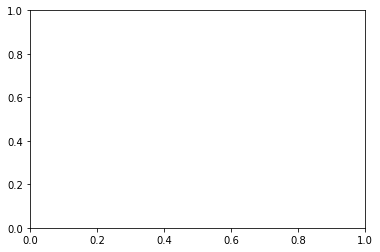